<a href="https://colab.research.google.com/github/anthonymelson/portfolio/blob/master/Comparing_Absorbing_and_Non_Absorbing_Markov_Chains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Set Style
plt.style.use('fivethirtyeight')

## What Are Markov Chains

Markov Chains are a type of stochastic process used to model events where there are multiple possible states a system can enter (or remain) whose transitions from one state to another depend only on the previous state (not the entire history).  The latter requirment for a system can be expressed by saying the system has "Markov Property".

Essentially, each possible state (of the many in one system) has:

1.  A probabiilty that it will remain in the same state
2.  The various probabilities that it will transfer into one of the other states

The beauty of Markov Chains is in the fact that (given Markov Property) if one knows the transition probabilities, the system will reach a "Steady State".  Meaning it will reach a point where it does not change any longer, and the amount of wieght in each node will remain there in all further iterations.  In this way, it can be said that Markov Chain "solves" the system, despite the fact that it is probabilistic.

## Absorbing vs Non-Absorbing Markov Chains



The key distinction examined in this notebook is between absorbing Markov Chains and non-absorbing Markov Chains.  To understand the difference, one must understand the difference between absorbing and transient (non-absorbing) states.  An absorbing state is a state that cannot be left once it is entered, while a transient state can be entered or left during a transition.

Thus, an absorbing state has a 100% chance of staying in the same state, while the transient state can either stay or change states.

Furthermore, when every state in the entire system can make it into an absorbing state, the system is called and "Absorbing Markov Chain".  Below are directed graphs showing absorbing and non-absorbing Markov Chains.


**Non-Absorbing Markov Chain**
![Non-Absorbing Markov Chain](https://drive.google.com/uc?id=12bZdYL4Tom527rpHX7Np-sCv3LuZEGP5)

This graph shows how each state returns weight to itself and other nodes, none of which are absorbing states, thus it is a non-absorbing Markov Chain.  In the end, weight will be distributed across all three nodes when this system reaches its steady state.

**Absorbing Markov Chain**
![Absorbing Markov Chain](https://drive.google.com/uc?id=1gKRckLhwT3BE4wgcf3PuMLf78WUcPVBV)

This graph shows that states 1 & 2 can both enter multiple nodes (are transient states), while states 0 and 3 can only enter themselves.  Since, both 1 and 2 can both reach 0 and 3, this is an absorbing Markov Chain.  In the end, all the weight in this system will end up in 0 and/or 3 when it reaches its steady state. 

Now that Markov Chains are understood, functions for running and plotting their results will be given, and examples of both types shown.

## Function For Markov Chain

The function below can run Markov Chains of both types.  It takes the initial state of the system (state), the probabilities of transitioning from one state to another (transition), and the number of iterations to run the chain for (iterations).

It works by iteratively taking the dot product of the two to find the solution to the chain.  It keeps track of the changes in the system with a list called stateTrack, and the final state with state.  It runs until the system converges or until the number of maximum iterations is reached.

It then outputs the state history (stateTrack), the length of the process (length), and the final steady-state the system reached (state).  This is all the information that is needed to visualize the process, and view the results.

In [0]:
 def MarkovChain(state, transition, iterations):
  stateHistory = []
  stateTrack = [state]
  last_state = []
  i = 0
  length = [0]
  convergence = False

  while convergence == False and i < iterations:
      last_state = state
      state = np.dot(state, transition)
      stateTrack.append(list(state))
      i = i + 1
      length.append(i)
      
      if all(last_state == state) == True:
          convergence = True

  return stateTrack, length, state

## Function to Plot Markov Chain Results

Below is the function to plot and view the results of the Markov Chain. It is a simple line plot that plots each node as a number called state, showing how much weight was in each state after each transition and in the end of the process.  Additionally, it gives a chart of the steady state and number of iterations run.

In [0]:
def PlotMarkov(stateTrack, length, state):
  labels = ['State %d' %i for i in range(len(state))]
  dims =(10.7, 7.27)
  fig, ax = plt.subplots(figsize=dims)
  plt.xlabel('Number of Transitions')
  plt.ylabel('Amount of Wieght in State')
  splot = pd.DataFrame(stateTrack, length, labels)
  sns.lineplot(ax=ax, data = splot, markers=True)

  results = {'Number of Iterations': i,
            'Steady State Vector': state}
  display(pd.DataFrame(data=results))

## Testing the Functions

### Run and Visualize Absorbing Markov Chain

First, the original state (weight distribution) is set, which in this case is all in the "starting state).  Then the transition probabilities are set.

In this example the probabilities of each non-absorbing state (i.e. 0, 1, 2, 3) have a non-zero probability of transfering to another state (including themselves).  Conversly, the absorbing states (4th and 5th states (bottom rows)), have a probability of 1 to transfer to themselves, meaning they cannot be left once entered.

Finally, the functions for the chain and its visualization are called.

,Number of Iterations,Steady State Vector
0,30,0.000584
1,30,0.001081
2,30,0.002079
3,30,0.001883
4,30,969.694630
5,30,1030.299742


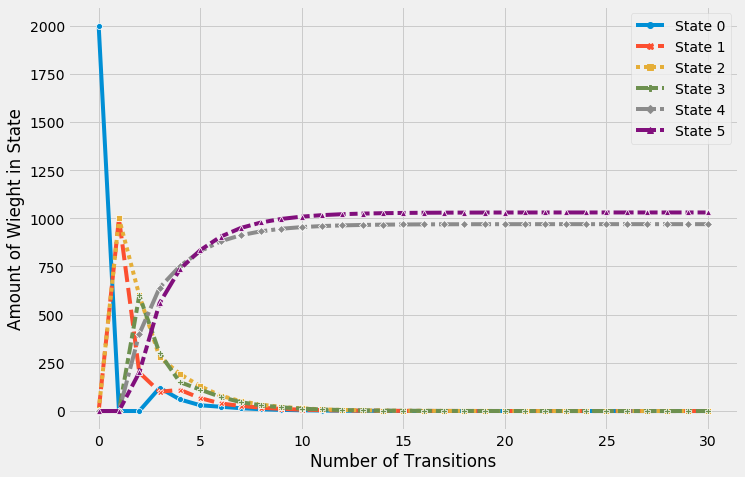

In [85]:
state = [2000, 0, 0, 0, 0, 0]

transition = [
        
            [0.0, 0.5, 0.5, 0.0, 0.0, 0.0],
            [0.0, 0.2, 0.2, 0.6, 0.0, 0.0],
            [0.0, 0.0, 0.4, 0.0, 0.4, 0.2],
            [0.2, 0.1, 0.0, 0.3, 0.0, 0.4],
            [0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
            
                            ]

stateTrack, length, state = MarkovChain(state, transition, 30)
PlotMarkov(stateTrack, length, state)

Though the process was stopped at 30 iterations, it is clear that all the wieght was going into states 4 and 5, and not leaving.

However, what is more interesting is the dynamics of the first 10 iterations.  Because of the various relations between the states, weight was being dumped back and forth in a violent manner to start.  Only after 3-4 iterations was any real stability gained in the system, but afterwards it was very smooth and evenly dumping weight off to the absorbing states.

This result should contrast strongly with the non-absorbing Markov Chain, which will be run next.

### Run and Visualize MC wo/ Absorbing Nodes

Nearly identical to the absorbing chain initialization: state, transition, run functions.

,Number of Iterations,Steady State Vector
0,30,639.053254
1,30,617.751479
2,30,543.195266


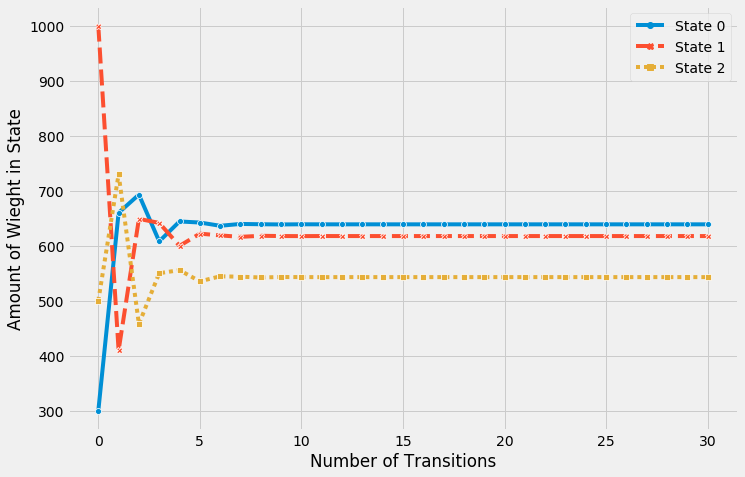

In [86]:
state = [300,1000,500]

transition = [
        
            [0.2, 0.7, 0.1],
            [0.3, 0.1, 0.6],
            [0.6, 0.2, 0.2]
            
                          ]   
stateTrack, length, state = MarkovChain(state, transition, 30)
PlotMarkov(stateTrack, length, state)

These are the expected results.  This shows the states dumping weight off to one another in a violent way (similarly to the absorbing state chain, but instead of having some nodes lose their weight altogether, each continues to be part of an ongoing exchange.

Finally, after the various probabilities have played out, the various states and weights within them stabilize (starting around iteration 4), and end in a steady state where each state has roughly the same amount of weight (with state 0 holding a slight advantage).